In [55]:
import sys
import calendar
import numpy as np
import pandas as pd
sys.path.append("../src")
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])
from matplotlib.ticker import ScalarFormatter

In [9]:
from data_loader import load_dataset
from utils import start_experiments, ExportConfig, ExperimentSetup

In [6]:
colors = {'NA': 'g', 'STG': '#1f77b4'}

In [10]:
NA_setup = ExperimentSetup(region="NA", depth="250", experiment="GCGOBGC")

In [20]:
STG_setup = ExperimentSetup(region="STG", depth="250", experiment="GCGOBGC")

### North Atlantic temporal distribution

In [11]:
train, validation = load_dataset(NA_setup)

In [12]:
na_df = pd.concat([train, validation])

In [13]:
na_dates = na_df["date_Argo"].str.split("/",expand=True).astype(int).rename(columns = {0:"Day",1:"Month",2:"Year"})

In [14]:
na_dates["Year"] += 2000

In [16]:
# Count frequencies 
na_year_counts = na_dates["Year"].value_counts().sort_index()
na_month_counts = na_dates["Month"].value_counts().sort_index()

In [29]:
# Convert month numbers to abbreviated names (e.g., 1 → Jan, 2 → Feb, ...)
month_labels = [calendar.month_abbr[m] for m in na_month_counts.index]

### Subtropical Gyres temporal distribution

In [21]:
train, validation = load_dataset(STG_setup)

In [24]:
stg_df = pd.concat([train, validation])

In [25]:
stg_dates = stg_df["date_Argo"].str.split("/",expand=True).astype(int).rename(columns = {0:"Day",1:"Month",2:"Year"})

In [26]:
stg_dates["Year"] += 2000

In [27]:
# Count frequencies 
stg_year_counts = stg_dates["Year"].value_counts().sort_index()
stg_month_counts = stg_dates["Month"].value_counts().sort_index()

In [42]:
# Convert month numbers to abbreviated names (e.g., 1 → Jan, 2 → Feb, ...)
month_labels = [calendar.month_abbr[m] for m in stg_month_counts.index]

In [44]:
# Ensure months 1–12 are always present for consistent comparison
for i in range(1, 13):
    if i not in na_month_counts.index:
        na_month_counts.loc[i] = 0
    if i not in stg_month_counts.index:
        stg_month_counts.loc[i] = 0

In [45]:
# Sort to align months correctly
na_month_counts = na_month_counts.sort_index()
stg_month_counts = stg_month_counts.sort_index()

In [46]:
# Get year union for alignment
all_years = sorted(set(na_year_counts.index).union(set(stg_year_counts.index)))
na_year_vals = [na_year_counts.get(y, 0) for y in all_years]
stg_year_vals = [stg_year_counts.get(y, 0) for y in all_years]

In [47]:
# Bar positions
bar_width = 0.4
x_year = np.arange(len(all_years))
x_month = np.arange(12)

### Plot temporal distribution

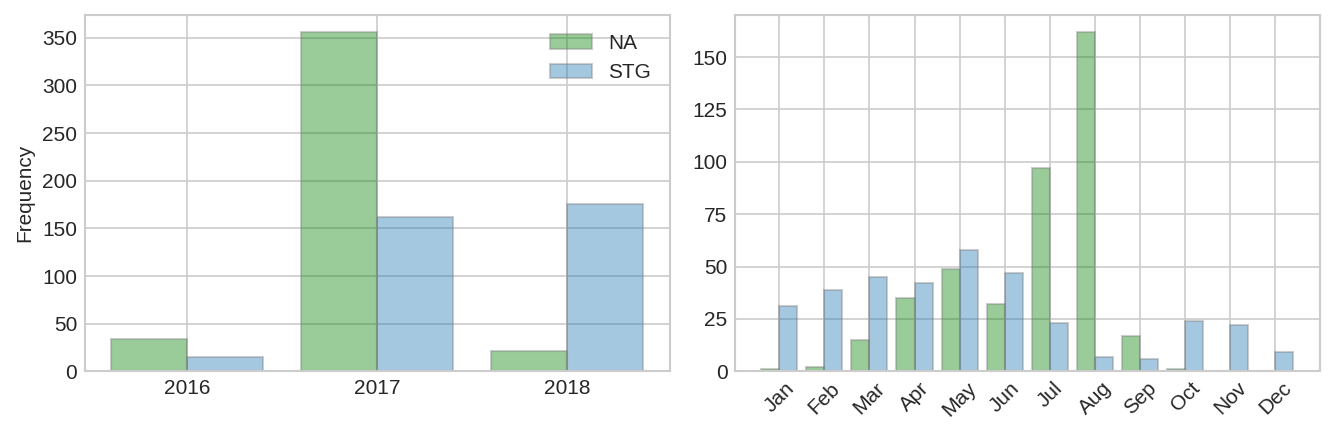

In [48]:
# --- Plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), dpi=150)

# --- Plot 1: Year counts ---
ax1.bar(x_year - bar_width/2, na_year_vals, width=bar_width, label='NA', color=colors["NA"], alpha=0.4, edgecolor='grey')
ax1.bar(x_year + bar_width/2, stg_year_vals, width=bar_width, label='STG', color=colors["STG"], alpha=0.4, edgecolor='grey')
ax1.set_xticks(x_year)
ax1.set_xticklabels(all_years)
ax1.set_ylabel("Frequency")
ax1.legend()

# --- Plot 2: Month counts ---
ax2.bar(x_month - bar_width/2, na_month_counts.values, width=bar_width, label='NA', color=colors["NA"], alpha=0.4, edgecolor='grey')
ax2.bar(x_month + bar_width/2, stg_month_counts.values, width=bar_width, label='STG', color=colors["STG"], alpha=0.4, edgecolor='grey')
ax2.set_xticks(x_month)
ax2.set_xticklabels(month_labels, rotation = 45)

plt.tight_layout()
plt.savefig(f"../datasets/Temporal_distribution.pdf")
plt.show()

### Bbp Distribution

In [51]:
bbp_na_outputs = na_df.columns[92:]
bbp_stg_outputs = stg_df.columns[92:]

In [52]:
bbp_na = na_df[bbp_na_outputs]
bbp_stg = stg_df[bbp_stg_outputs]

In [53]:
# Compute mean and standard deviation across measurements (axis=0)
mean_profile_na = bbp_na.mean(axis=0)
std_profile_na = bbp_na.std(axis=0)

In [57]:
# Compute mean and standard deviation across measurements (axis=0)
mean_profile_stg = bbp_stg.mean(axis=0)
std_profile_stg = bbp_stg.std(axis=0)

In [58]:
# Depths from 0 to -250 m
depths = np.linspace(-1, -250, 126)

### Plot Bbp distribution

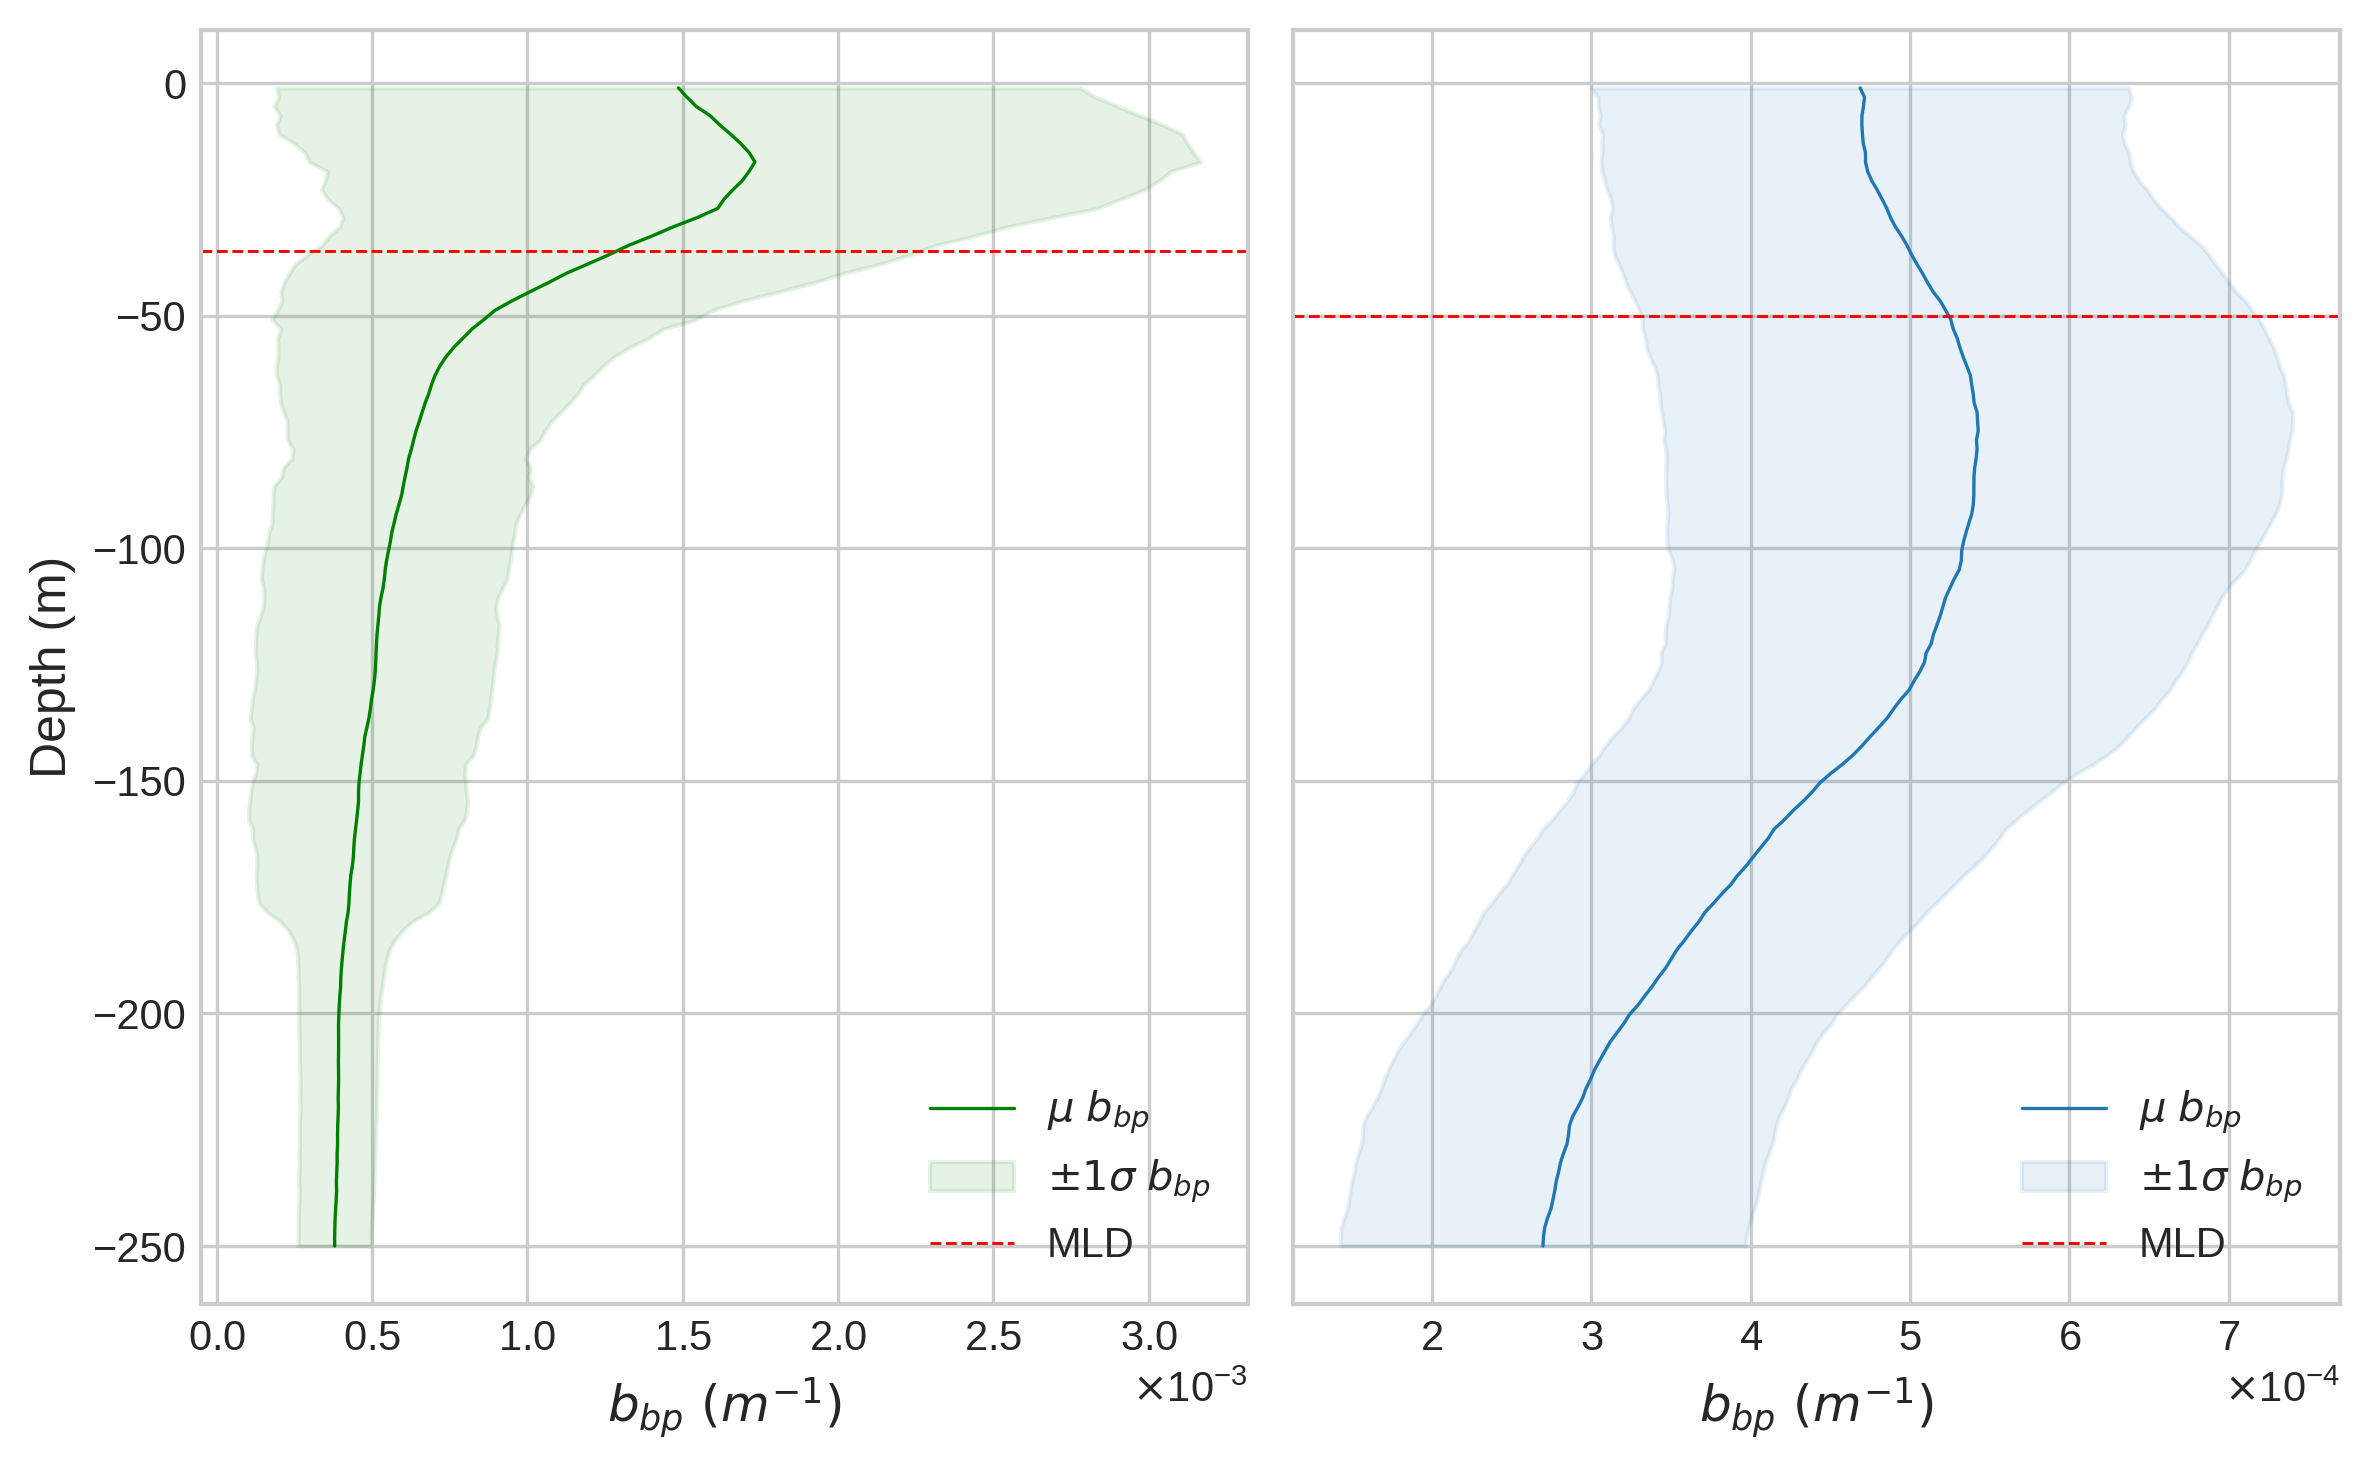

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), dpi=300, sharey=True)

# === NA Plot (Green) ===
ax = axes[0]
ax.plot(mean_profile_na, depths, label=r'$\mu$ $b_{bp}$', color='g', linewidth=0.8)
ax.fill_betweenx(depths, mean_profile_na - std_profile_na, mean_profile_na + std_profile_na,
                 color='g', alpha=0.1, label=r'$\pm 1\sigma$ $b_{bp}$')
ax.axhline(-36, color='red', linestyle='--', linewidth=0.7, label='MLD')

ax.set_xlabel(r'$b_{bp}\ (m^{-1})$', fontsize=12)
ax.set_ylabel('Depth (m)', fontsize=12)
#ax.set_title('North Atlantic', fontsize=12)
ax.grid(True)
ax.legend(fontsize=10)

# === STG Plot (Blue) ===
ax = axes[1]
ax.plot(mean_profile_stg, depths, label=r'$\mu$ $b_{bp}$', color='#1f77b4', linewidth=0.8)
ax.fill_betweenx(depths, mean_profile_stg - std_profile_stg, mean_profile_stg + std_profile_stg,
                 color='#1f77b4', alpha=0.1, label=r'$\pm 1\sigma$ $b_{bp}$')
ax.axhline(-50, color='red', linestyle='--', linewidth=0.7, label='MLD')

ax.set_xlabel(r'$b_{bp}\ (m^{-1})$', fontsize=12)
#ax.set_title('Subtropical Gyres', fontsize=12)
ax.grid(True)
ax.legend(fontsize=10)

# Shared Y-axis setup
axes[0].set_yticks(np.linspace(-250, 0, 6))
axes[1].set_yticks(np.linspace(-250, 0, 6))
axes[1].set_ylabel("")  # Don't repeat label
import matplotlib.ticker as ticker
for ax in axes:
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.savefig(f"../datasets/Bbp_distribution.pdf")
    
plt.show()
